## Author : Gouthami Suvarna
## Task: 6

In [2]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from IPython.display import Image
from sklearn import tree

In [3]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data = data.drop('Id',axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
print(data.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


<AxesSubplot:ylabel='Species'>

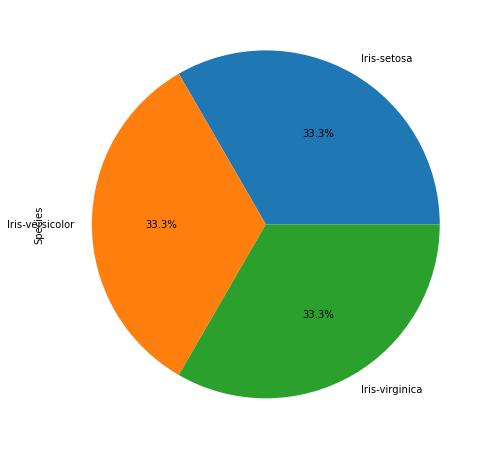

In [8]:
data.Species.value_counts().plot(kind="pie",autopct='%.1f%%',figsize = (8,8))


__THIS SHOWS THAT THE DATA IS BALANCED__

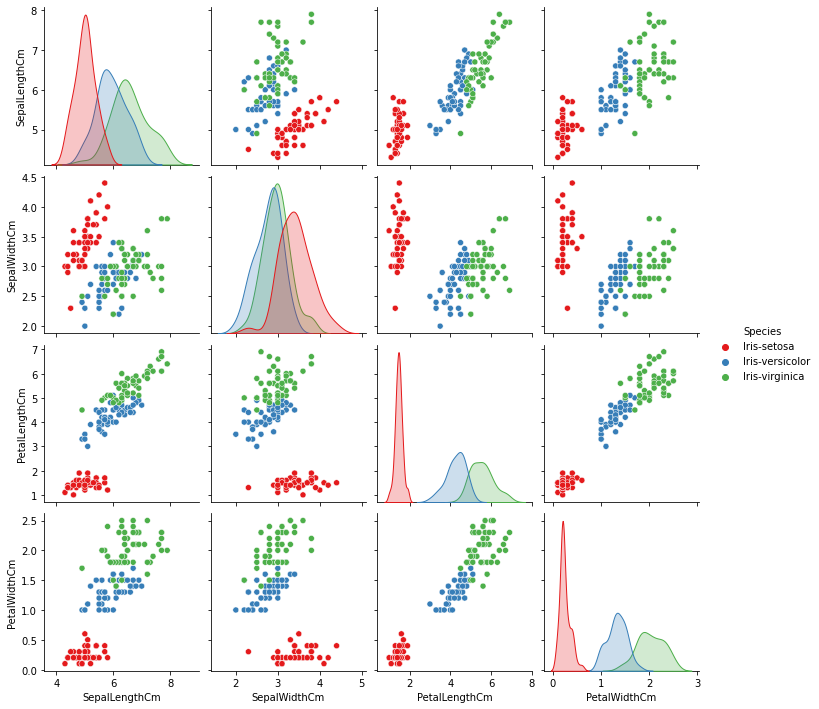

In [9]:
sns.pairplot(data, hue='Species',palette='Set1')

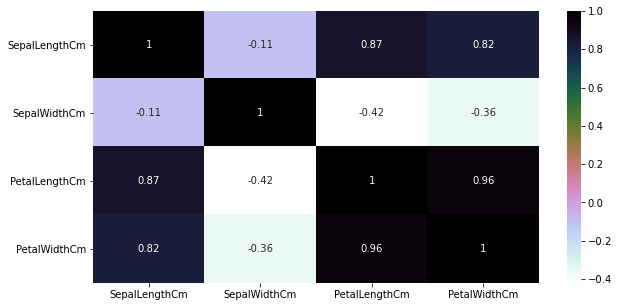

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r')
plt.show()

__SPLITTING THE DATA SET INTO TEST AND TRAIN SET__

In [11]:
from sklearn.model_selection import train_test_split
X = data.drop('Species', axis=1)
y = data['Species']


In [12]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

__DECISION TREE__

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

__Prediction and Evaluation__

In [14]:
print(x_test)
predictions = dtree.predict(x_test)
predictions

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
89             5.5           2.5            4.0           1.3
46             5.1           3.8            1.6           0.2
92             5.8           2.6            4.0           1.2
80             5.5           2.4            3.8           1.1
60             5.0           2.0            3.5           1.0
44             5.1           3.8            1.9           0.4
126            6.2           2.8            4.8           1.8
65             6.7           3.1            4.4           1.4
100            6.3           3.3            6.0           2.5
41             4.5           2.3            1.3           0.3
52             6.9           3.1            4.9           1.5
134            6.1           2.6            5.6           1.4
123            6.3           2.7            4.9           1.8
21             5.1           3.7            1.5           0.4
73             6.1           2.8            4.7           1.2


array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification report:')
print(classification_report(y_test,predictions))

Classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         4
Iris-versicolor       1.00      1.00      1.00         7
 Iris-virginica       1.00      1.00      1.00         4

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15



In [16]:
print(confusion_matrix(y_test,predictions))

[[4 0 0]
 [0 7 0]
 [0 0 4]]


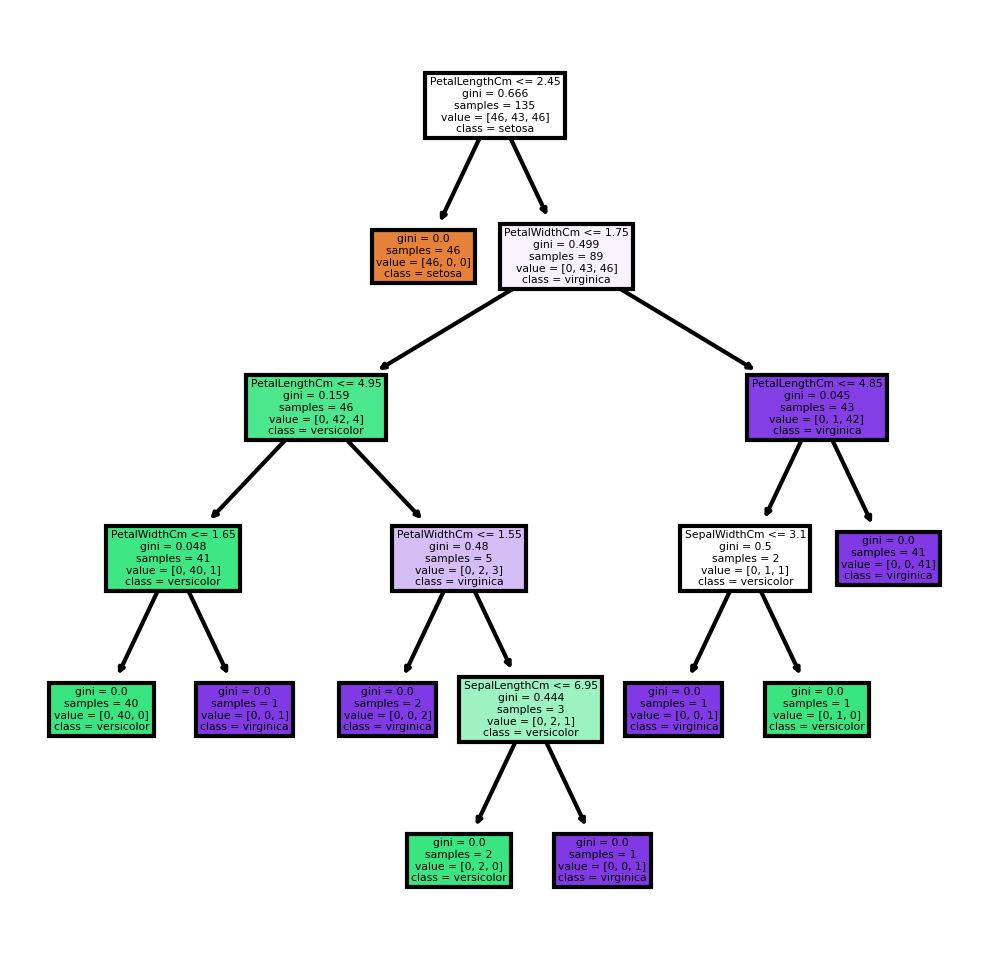

In [17]:
fn = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn = ['setosa','versicolor','virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi = 300)
tree.plot_tree(dtree,
              feature_names=fn,
              class_names=cn,
              filled=True);
fig.savefig('result_tree.png')

__User Input Prediction__

In [18]:
new_data = [float(num) for num in (input("Enter the data in the order of Sepal.Length Sepal.Width Petal.Length Petal.Width\t:").strip().split())]
predictions = dtree.predict([new_data])
print(predictions)

Enter the data in the order of Sepal.Length Sepal.Width Petal.Length Petal.Width	: 2.5 5.5 4.5 1.3


['Iris-versicolor']


__Thank you__